Fait par: Rabab Elalaoui & Oumoukelthoum Sidenna

# **Wind Turbine Scada Database Model evaluation**





## Importation des bibliothèques

In [1]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df= pd.read_csv("ProcessData.csv")

# **VAR Model**

In [8]:
df= pd.read_csv("processedData.csv")
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
#definir Dataframe
df_var=df[["Time","ActivePower","WindSpeed","Theoretical_Power_Curve"]]
df_var.set_index("Time",inplace=True)
#train & test
nobs = 5053
df_train, df_test = df_var[0:-nobs], df_var[-nobs:]
#implementation du model
model = VAR(df_var)
model_fitted = model.fit(18)
# Input data for forecasting
forecast_input = df_var.values[-nobs:]
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_var.index[-nobs:], columns=df_var.columns + '_forecast')
test_original = df_test
#test_original.index = pd.to_datetime(test_original.index)
y_test=test_original['ActivePower']
y_pred=df_forecast['ActivePower_forecast']

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## **Visualisation des prédictions de VAR Model**

Text(0.5, 1.0, 'VAR Predictions')

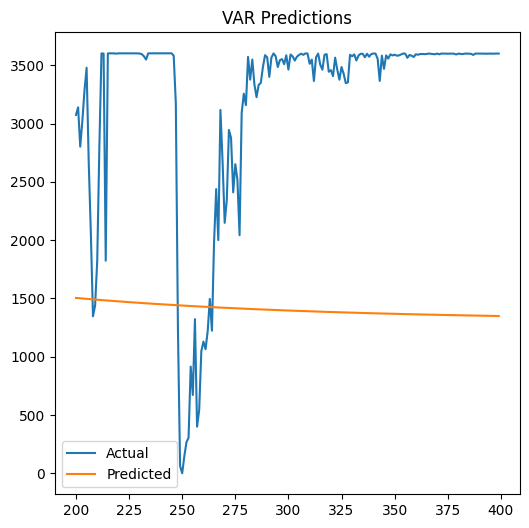

In [9]:
sam=200
f=2
plt.rcParams["figure.figsize"] = (6, 6)
plt.plot(range(sam,f*sam),y_test[sam:f*sam], label='Actual')
plt.plot(range(sam,f*sam),y_pred[sam:f*sam], label='Predicted')
plt.legend()
plt.title('VAR Predictions')

In [10]:
import math
MSE = np.square(np.subtract(y_test,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("RMSE: %.2f" % RMSE)

RMSE: 1442.83


## Conclusion
D'après les résultats obtenus, il est possible de conclure que le modèle VAR n'a pas fourni des prévisions précises, comme en témoignent le graphique et la valeur élevée du RMSE. En conséquence, il ne peut pas être considéré comme un modèle de référence pour l'étude en cours.

# Régression Linéaire

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
SEED=42

X=df[["WindSpeed", "Theoretical_Power_Curve", "WindDirection"]]
y=df['ActivePower']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)
# Créer le modèle de régression linéaire
regression = LinearRegression()

# Entraîner le modèle avec les données d'entraînement
regression.fit(X_train, y_train)

# Prédire de nouvelles valeurs
  # Nouvelles valeurs pour prédire
y_pred = regression.predict(X_test)

# Visualisation de performance de RL

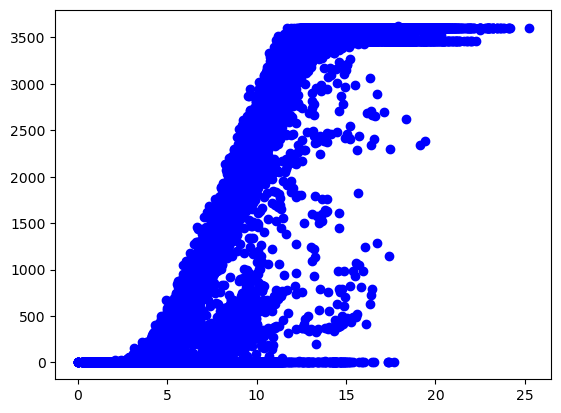

In [6]:
plt.scatter(X_train['WindSpeed'], y_train, color='blue', label='Données d\'entraînement')

Text(0.5, 1.0, 'Linear Regression Predictions')

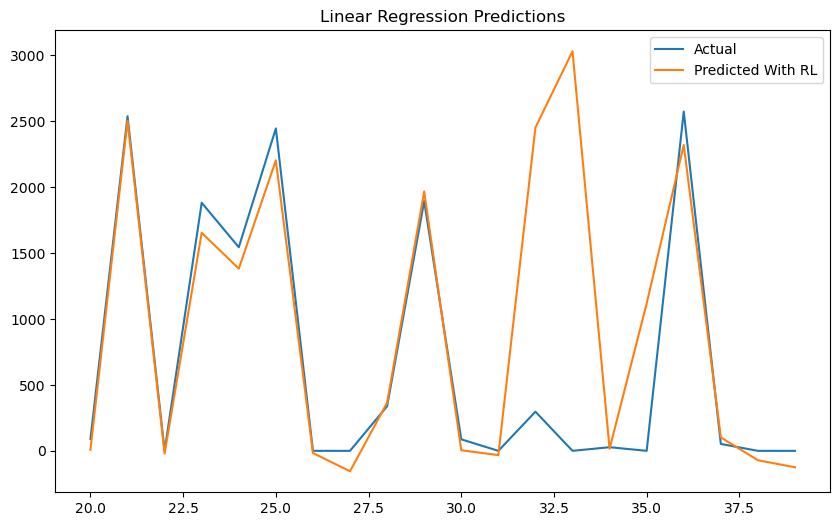

In [7]:
# Visualiser les prédictions
sam=20
f=2
plt.rcParams["figure.figsize"] = (10, 6)
plt.plot(range(sam,f*sam),y_test[sam:f*sam], label='Actual')
plt.plot(range(sam,f*sam),y_pred[sam:f*sam], label='Predicted With RL')
plt.legend()
plt.title('Linear Regression Predictions')

# **Random Forest**

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
SEED=42
X=df[["WindSpeed", "Theoretical_Power_Curve", "WindDirection"]]
y=df['ActivePower']
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=SEED)
rfr = RandomForestRegressor(n_estimators=100, # 100 trees
                            max_depth=6, # 6 levels
                            random_state=SEED)

rfr.fit(X_train, y_train)
y_pred1 = rfr.predict(X_test)

In [12]:
import math

MSE = np.square(np.subtract(y_test,y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("RMSE: %.2f" % RMSE)

RMSE: 387.97


# **Visualisation de première et dernière arbre de décision du modèle**

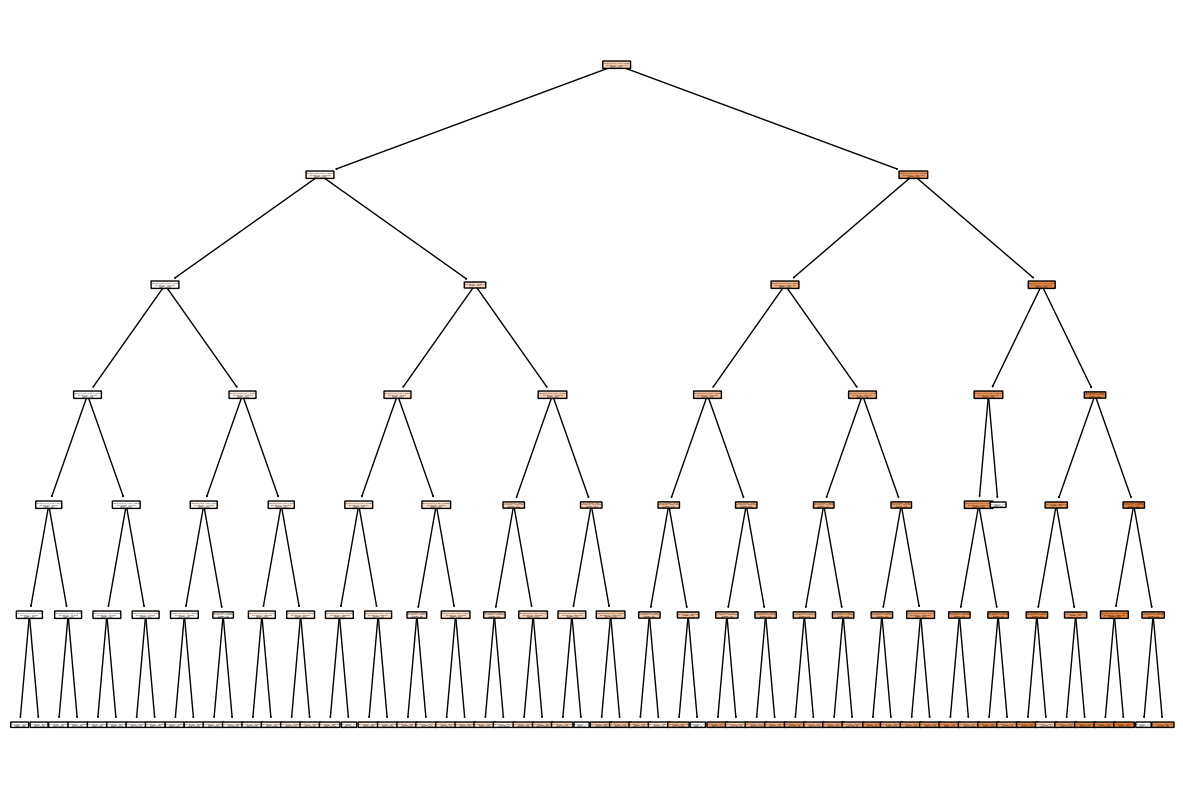

In [14]:
#pip install graphviz
from sklearn.tree import plot_tree
import graphviz
from sklearn.tree import export_graphviz

fig = plt.figure(figsize=(15, 10))
plot_tree(rfr.estimators_[0], 
          feature_names=X.columns,
          class_names="ActivePower", 
          filled=True, impurity=True, 
          rounded=True)
fig.savefig('fig.png')

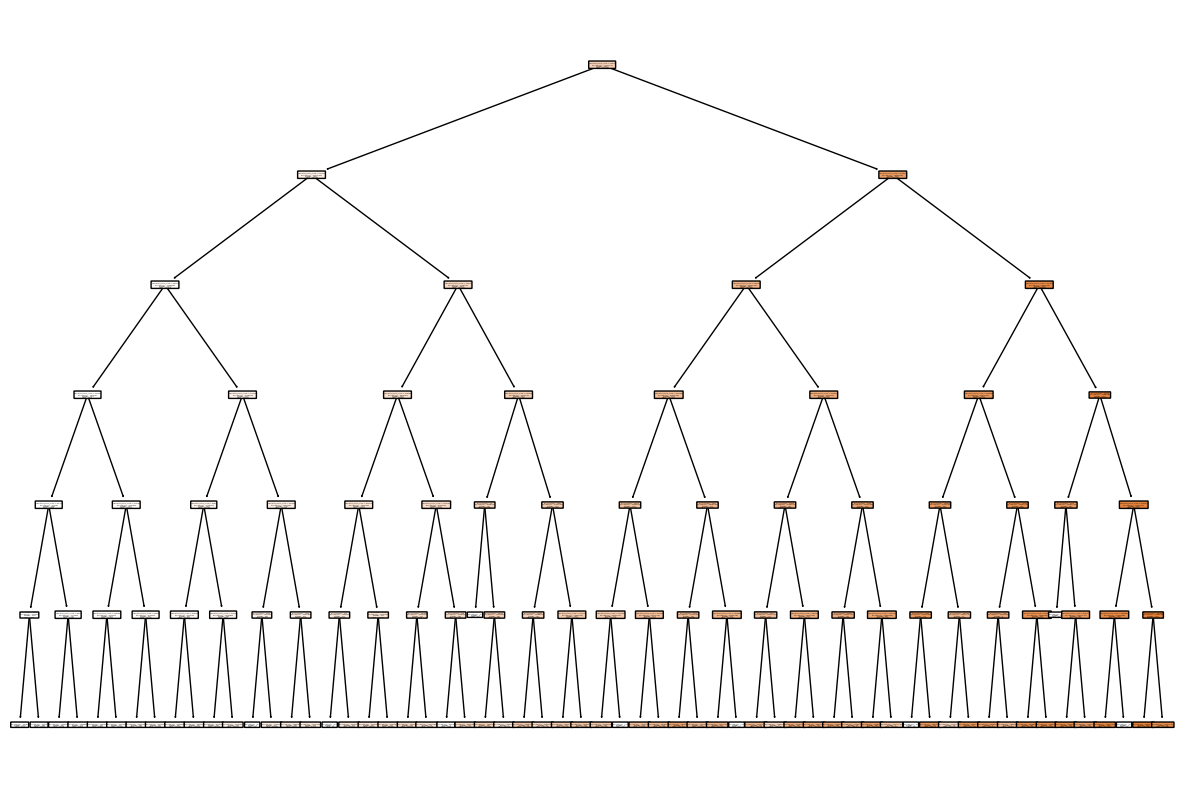

In [15]:
fig = plt.figure(figsize=(15, 10))
plot_tree(rfr.estimators_[99], 
                           feature_names=X.columns,
                           class_names="ActivePower", 
                           filled=True, impurity=True, 
                           rounded=True)
fig.savefig('dot_data.png')

# **Visualisation des prédictions de Random Forest**

Text(0.5, 1.0, 'Random Forest Predictions')

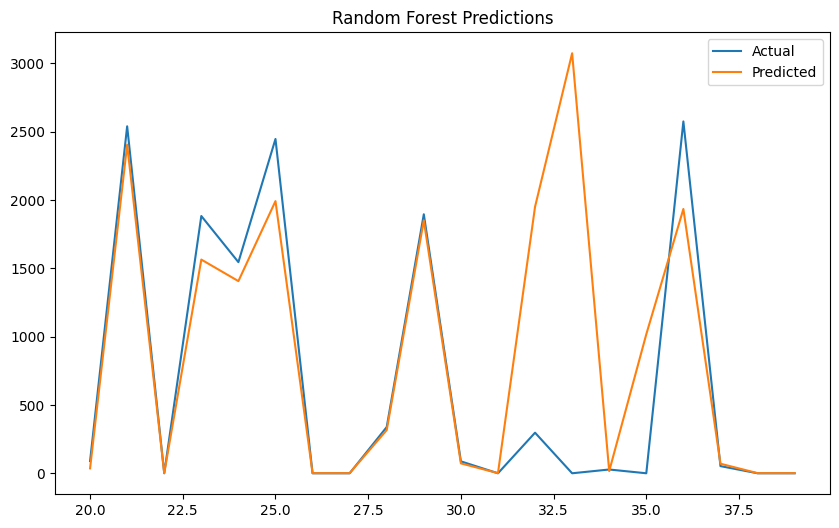

In [16]:
# Visualiser les prédictions
sam=20
f=2
plt.rcParams["figure.figsize"] = (10, 6)
plt.plot(range(sam,f*sam),y_test[sam:f*sam], label='Actual')
plt.plot(range(sam,f*sam),y_pred[sam:f*sam], label='Predicted')
plt.legend()
plt.title('Random Forest Predictions')

## **Conclusion**
En se fondant sur l'examen du graphique correspondant ainsi que sur l'analyse de la valeur de l'erreur quadratique moyenne (RMSE), il apparaît clairement que le modèle Random Forest a produit des résultats prédictifs nettement plus satisfaisants.

# **XGBoost**

In [13]:
!pip install xgboost

     ---------------------------------------- 70.9/70.9 MB 2.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = data[['Time','ActivePower','Theoretical_Power_Curve','WindSpeed']]
data['Time'] = pd.to_datetime(data['Time']) # Convert Time to datetime format
data['Time'] = data['Time'].astype(int) / 10**9 # Convert Time to UNIX timestamp format

# preprocess the data as necessary

# Split the data into training and testing sets
X = data.drop(['ActivePower'], axis=1)
y = data['ActivePower']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your XGBoost model
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 5, n_estimators = 100)

# Train your XGBoost model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred2 = model.predict(X_test)

# Evaluate your XGBoost model
mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5
print("RMSE: %.2f" % rmse)

ModuleNotFoundError: No module named 'xgboost'

# **XGBoost tree**

Chaque nœud de l'arbre représente une décision basée sur une caractéristique et une valeur seuil. Le nœud racine représente la première décision, et les nœuds feuilles représentent les prédictions finales.\
Ci-dessous on visualise le premier arbre du XGBoost

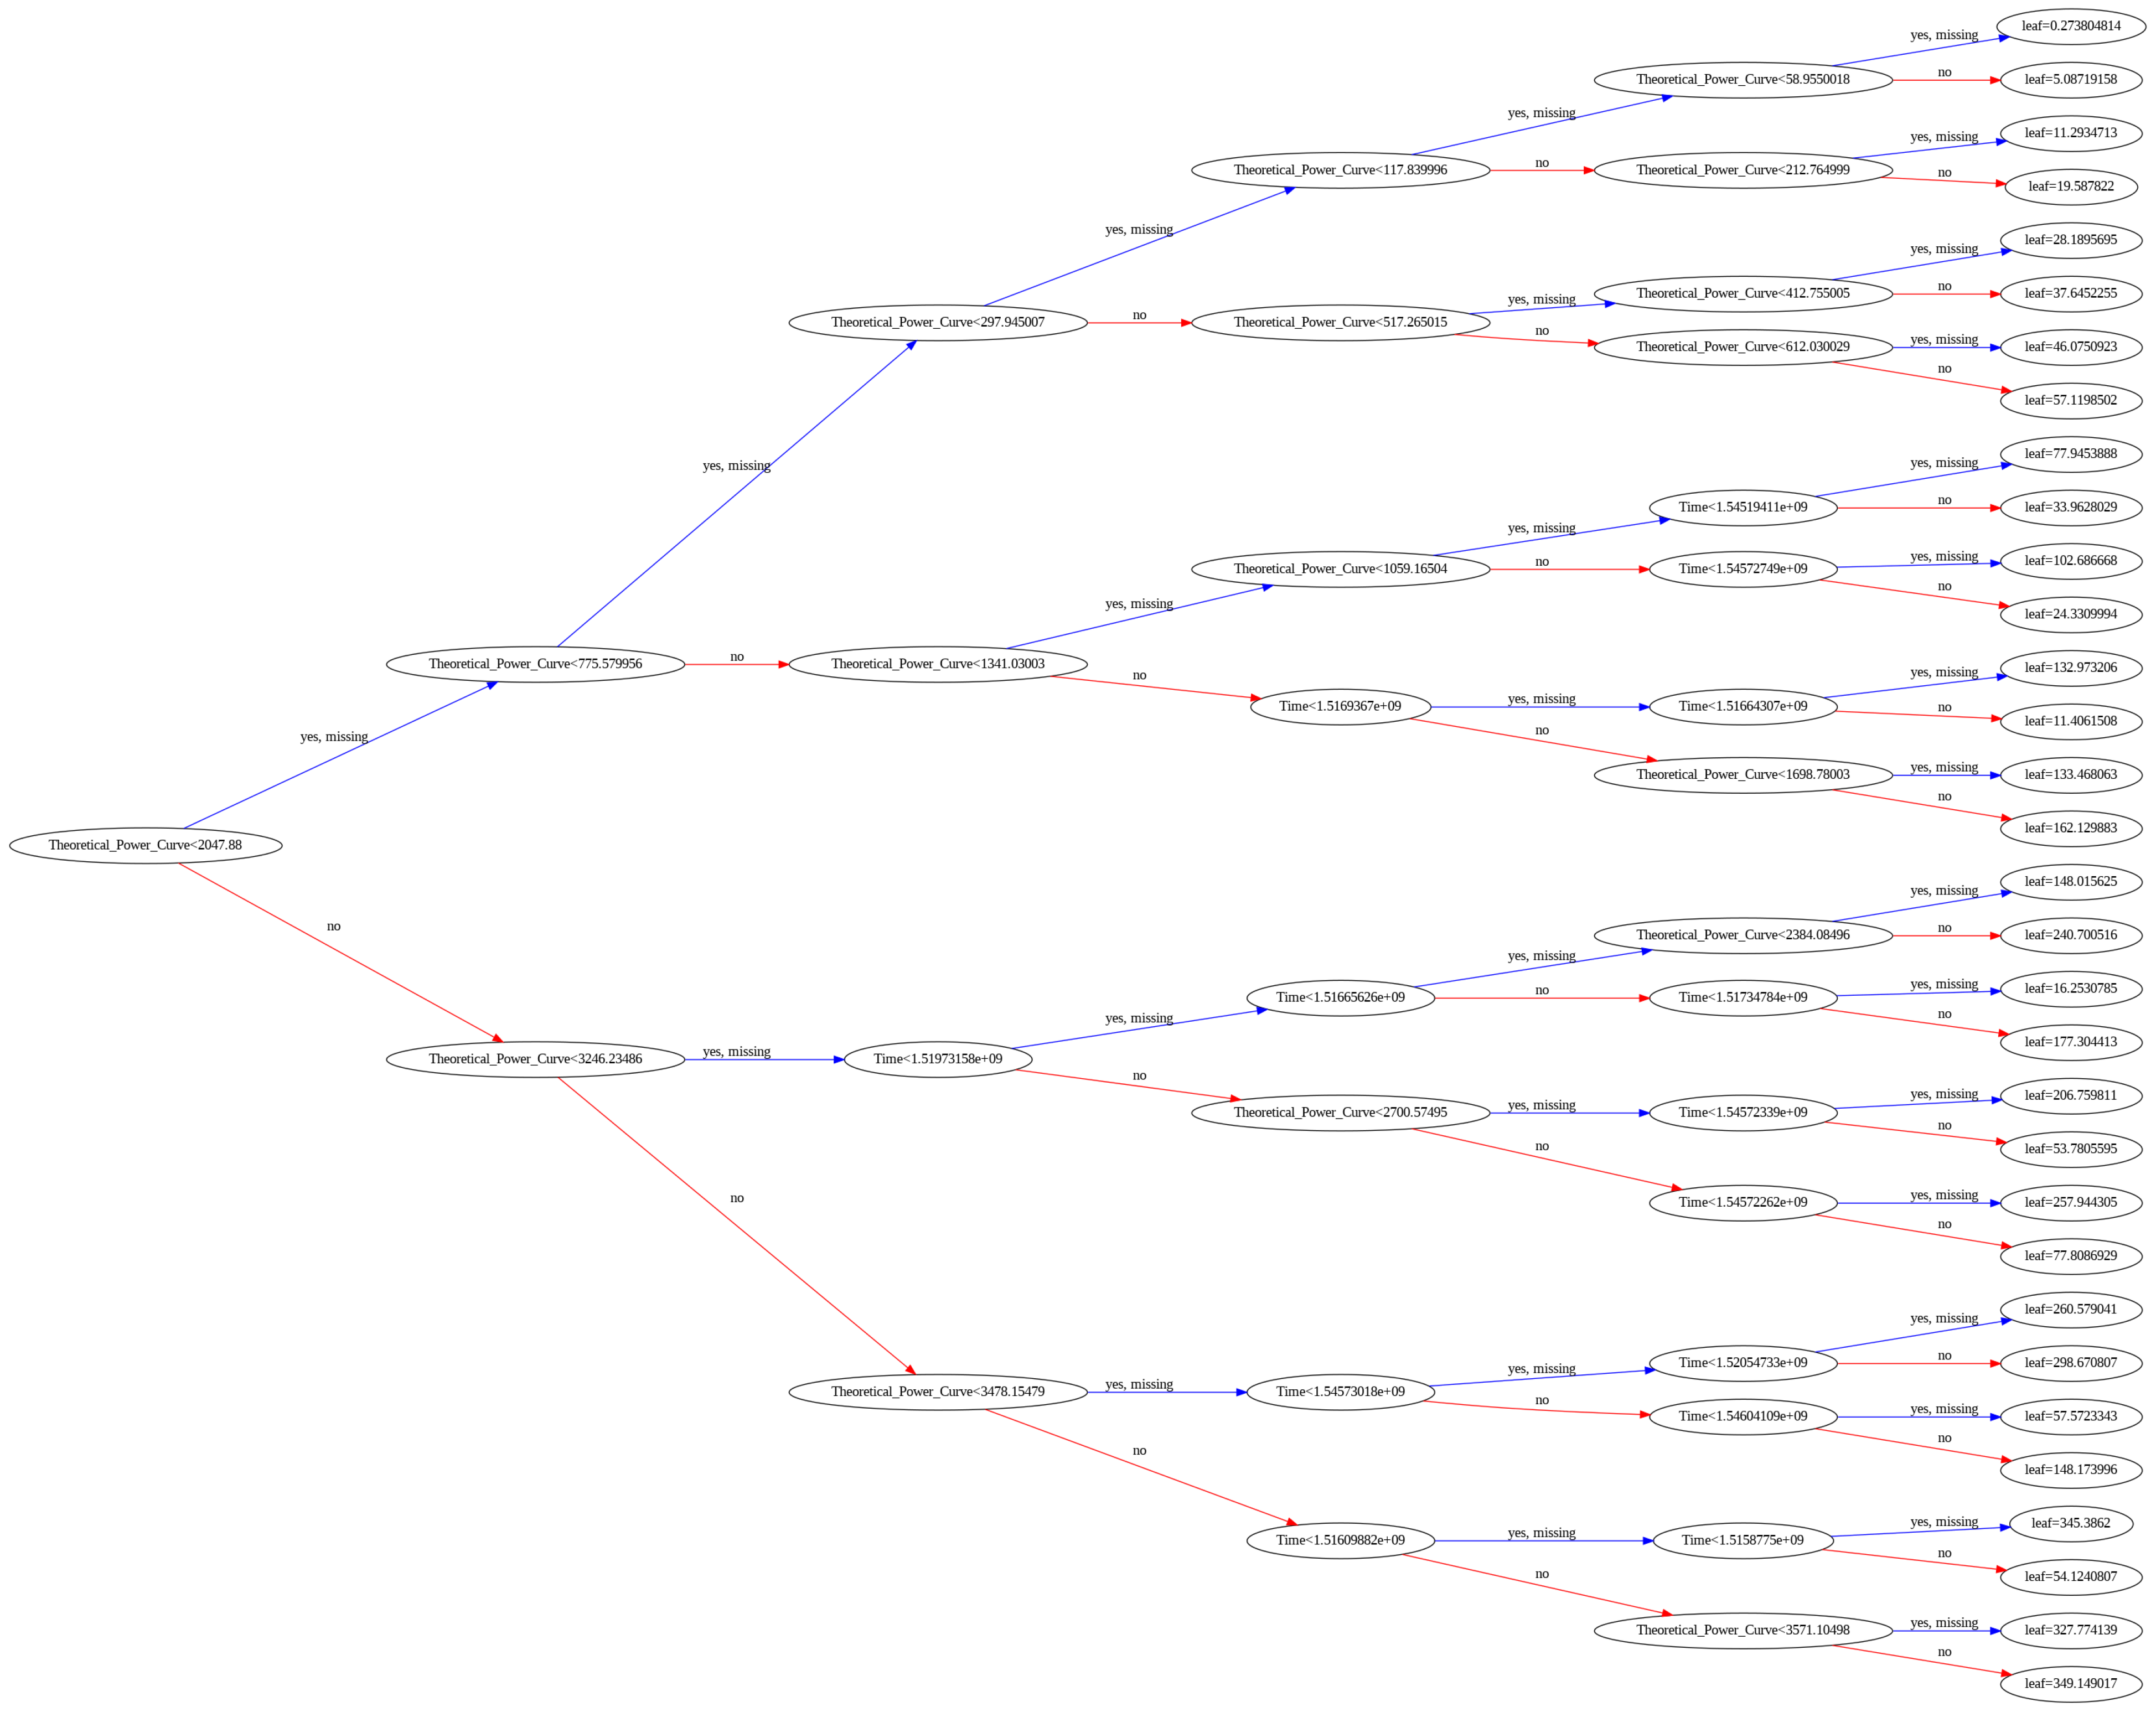

In [18]:
from xgboost import plot_tree

plt.rcParams["figure.figsize"] = (50, 50)
plot_tree(model, num_trees=0, rankdir='LR')
plt.show()

# **Les meilleurs caractéristiques**

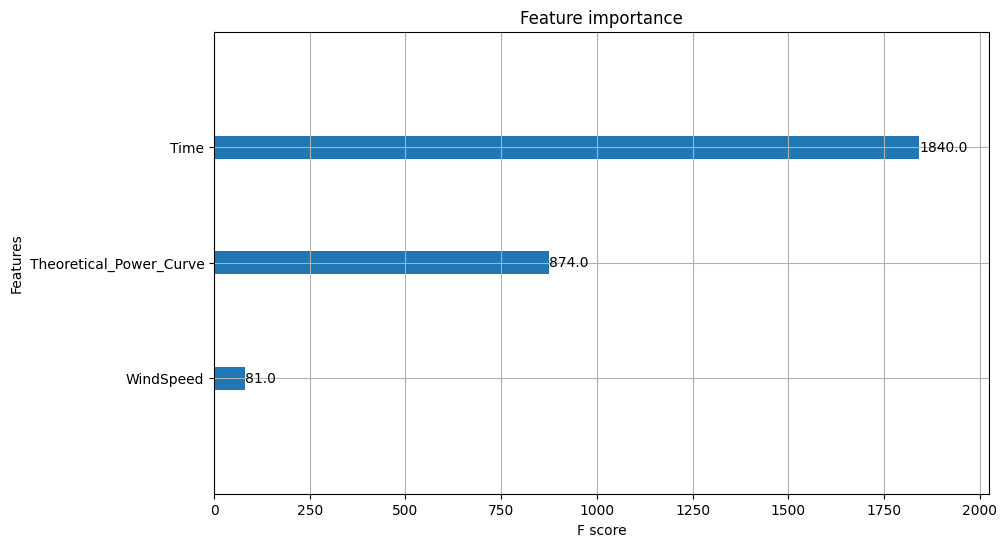

In [20]:
# Get the feature importances
importance = model.feature_importances_
plt.rcParams["figure.figsize"] = (10, 6)
# Plot the feature importances
xgb.plot_importance(model)
plt.show()

# **Interprétation**

Les deux visualisations précédentes montrent que la varibale temps est la plus importante entre autre. En outre, la sélection des caractéristiques permet de réduire la dimensionnalité des données et de supprimer les caractéristiques redondantes ou peu pertinentes, ce qui permet d'améliorer les performances du modèle en termes de précision, de vitesse de traitement et de généralisation. Cet aspet sera utilisé dans le modèle suivant le LSTM.

# **Visualisation des prédictions de XGBoost**

Text(0.5, 1.0, 'XGB Predictions')

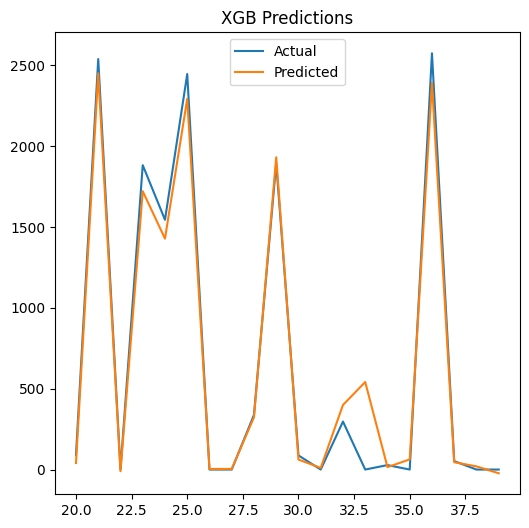

In [21]:
# Visualiser les prédictions
sam=20
f=2
plt.rcParams["figure.figsize"] = (6, 6)
plt.plot(range(sam,f*sam),y_test[sam:f*sam], label='Actual')
plt.plot(range(sam,f*sam),y_pred[sam:f*sam], label='Predicted')
plt.legend()
plt.title('XGB Predictions')

Il semblerait que la prédiction faite par XGBoost soit acceptable, ce qui était attendu étant donné le RMSE relativement bon. le modèle semble fournir des résultats conformes aux attentes.

# **LSTM**

In [22]:
from pandas import DataFrame, Series, concat
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [23]:
df= pd.read_csv('processedData.csv')
df = df.set_index('Time')

In [24]:
# Hardcode all variables
batch_size_exp = 1
epoch_exp = 5
neurons_exp = 10
predict_values_exp = 1000
lag_exp=24

In [25]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=1, shuffle=False)
        model.reset_states()
    return model
    print(model.summary)
    
# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    #print(X)
    yhat = model.predict(X, batch_size=1)
    return yhat[0,0]


In [26]:

'''Drop all the features as we will not be having any in production'''

df.drop(['ActivePower', 'WindSpeed', 'WindDirection', 'Loss', 'month', 'Day', 'Hours', 'Minutes', 'mean_Direction', 'Direction'], axis=1, inplace=True)

df.head()

,Theoretical_Power_Curve
Time,
01 01 2018 00:00,416.33
01 01 2018 00:10,519.92
01 01 2018 00:20,390.90
01 01 2018 00:30,516.13
01 01 2018 00:40,491.70


In [27]:
for i in range(0,10):
  df = df[:-1]
df.tail()

# transform data to be stationary
raw_values = df.values
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, lag_exp)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-predict_values_exp], supervised_values[-predict_values_exp:]
# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)


In [28]:
# fit the model
lstm_model = fit_lstm(train_scaled, batch_size_exp, epoch_exp, neurons_exp)

49519/49519 [==============================] - 165s 3ms/step - loss: 0.0056


In [29]:
# walk-forward validation on the test data
predictions = list()
expectations = list()
predictions_plot = list()
expectations_plot = list()
test_pred = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)#batch_size_exp to 1
    # Replacing value in test scaled with the predicted value.
    test_pred = [yhat] + test_pred 
    if len(test_pred) > lag_exp+1:
        test_pred = test_pred[:-1]
    if i+1<len(test_scaled):
        if i+1 > lag_exp+1:
            test_scaled[i+1] = test_pred
        else:
            test_scaled[i+1] = np.concatenate((test_pred, test_scaled[i+1, i+1:]),axis=0)

    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # store forecast
    expected = raw_values[len(train) + i + 1]
    predictions_plot.append(yhat)
    expectations_plot.append(expected)
    if expected != 0:
        predictions.append(yhat)
        expectations.append(expected)
    print('Hour=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))

1/1 [==============================] - 1s 898ms/step
Hour=1, Predicted=3612.599570, Expected=3600.000000
1/1 [==============================] - 0s 33ms/step
Hour=2, Predicted=3610.631456, Expected=3600.000000
1/1 [==============================] - 0s 39ms/step
Hour=3, Predicted=3608.783053, Expected=3600.000000
1/1 [==============================] - 0s 37ms/step
Hour=4, Predicted=3607.875143, Expected=2506.110000
1/1 [==============================] - 0s 36ms/step
Hour=5, Predicted=2513.489158, Expected=1954.280000
1/1 [==============================] - 0s 94ms/step
Hour=6, Predicted=1961.552430, Expected=1128.680000
1/1 [==============================] - 0s 130ms/step
Hour=7, Predicted=1135.600243, Expected=2087.000000
1/1 [==============================] - 0s 48ms/step
Hour=8, Predicted=2093.981458, Expected=1497.140000
1/1 [==============================] - 0s 53ms/step
Hour=9, Predicted=1503.763474, Expected=3143.880000
1/1 [==============================] - 0s 43ms/step
Hour=10, P

In [30]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (1, 10)                   1400      
                                                                 
 dense (Dense)               (1, 1)                    11        
                                                                 
Total params: 1,411
Trainable params: 1,411
Non-trainable params: 0
_________________________________________________________________


## **Calculating Mean Absolute Error**

In [31]:
expectations = np.array(expectations)
predictions = np.array(predictions)
print("Mean Absolute Percent Error: ", (np.mean(np.abs((expectations - predictions) / expectations))))

Mean Absolute Percent Error:  0.46111614437416437


In [32]:
from sklearn.metrics import mean_squared_error
import numpy as np

expectations = np.array(expectations)
predictions = np.array(predictions)

rmse = np.sqrt(mean_squared_error(expectations, predictions))

print("RMSE: ", rmse)


RMSE:  329.8392058912258


# **Final Prediction Plot**

Text(0.5, 1.0, 'LSTM Predictions')

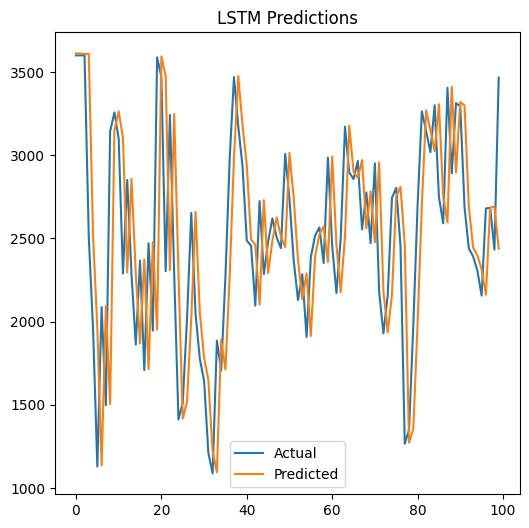

In [33]:
# Visualiser les prédictions

plt.rcParams["figure.figsize"] = (6, 6)
plt.plot(expectations_plot[0:100], label='Actual')
plt.plot(predictions_plot[0:100], label='Predicted')
plt.legend()
plt.title('LSTM Predictions')

# **Interprétation**

Étant donné que notre modèle ne prend en compte que la variable temps, il n'est pas nécessaire de visualiser le feature selection. Néanmoins, il est important de noter que le RMSE de notre modèle est plus petit que celui du XGBoost. Cela indique que notre modèle fournit des prédictions plus précises et conformes aux résultats attendus. Par conséquent, même si nous n'avons pas besoin de visualiser les caractéristiques sélectionnées, nous pouvons conclure que notre approche est efficace et donne de bons résultats.

# **Conclusion**
En comparant les résultats obtenus pour les quatre modèles, il peut être conclu que le modèle XGBoost est le meilleur choix parmi les quatre. En effet, le RMSE pour XGBoost est le plus faible, ce qui indique que les prévisions sont plus précises. De plus, le pouvoir prédictif de XGBoost est également plus fort que celui des trois autres modèles, ce qui renforce cette conclusion. En somme, le modèle XGBoost est le choix le plus optimal pour ce problème de prédiction.